In [0]:
import tensorflow as tf
import numpy as np

constante:  no cambia en el tiempo

variable:

placeholder: 


Se puede castear

Se puede asignar nombre a las variables constante u operaciones.

Name scope permite agrupar




In [0]:
with tf.name_scope('MeetUp'):
  node1 = tf.constant(3.0, dtype=tf.float32, name='node1')
  node2 = tf.constant(4.0, dtype=tf.float16, name='node2')
  suma = tf.add(node1, tf.cast(node2, dtype=tf.float32), name='suma')  #castear)
                
multi = tf.multiply(node1, suma, name='multi')


Para acceder a los datos solo se hace con sesiones:

Se puede usar run o eval

In [0]:
with tf.Session() as sess:
  r =sess.run(suma)
  r2 = suma.eval()
  print(r)

7.0


Existe una funcion para no necesitar el sesion

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

node1 = tf.constant(3.0, dtype=tf.float32, name='node1')
node2 = tf.constant(4.0, dtype=tf.float16, name='node2')
suma = node1 + tf.cast(node2, dtype=tf.float32)  #castear
multi = tf.multiply(node1, suma, name='multi')
print(node1)


tf.Tensor(3.0, shape=(), dtype=float32)


Placeholder: es como input de entrada


Cuando un grafo se genera este ya no puede ser cambiado, a menos que se use placeholders


Las Variables solo son carcazas, para llenarlos de valores se tiene que abrir una session: global_variables_initializer

Se debe dar valor a los placeholder en el feeddict

Para asignar un valor a una variable usar: assign

In [0]:
a = tf.placeholder(dtype=tf.float32, shape={})
b = tf.placeholder(dtype=tf.float32, shape={})
c = tf.Variable(tf.zeros((), dtype=tf.int8), dtype=tf.int8) # zero un valor simple, tbm puede ser matrices

suma = tf.add(a,b)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  s, var1 = sess.run([suma, c], feed_dict={a:1, b:5})
  s2 = sess.run(suma, feed_dict={a:10, b:2.5})
  print(s, var1, s2)
  
  
  for i in range(10):
    aux = tf.cast(suma, dtype=tf.int8)
    suma_c = c.assign(c + aux)
    print(sess.run(suma_c, feed_dict={a:10, b:3})) # aqui se tiene que anhadir el feeddict ya que la variable suma tiene placeholders

6.0 0 12.5
13
26
39
52
65
78
91
104
117
-126


In [0]:
W = tf.Variable(tf.truncated_normal([1], mean=0, stddev=1, name='weight'))
b = tf.Variable(tf.truncated_normal([1]), name='bias')
X = tf.placeholder(shape=[None], dtype=tf.float32)
Y = tf.placeholder(shape=[None], dtype=tf.float32)

In [0]:
hypothesis = X*W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y)) # square error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) # ya inicializa las variables
train = optimizer.minimize(cost) # entrenar y actualizar las variables , se necesita inicializar en la session

epoch = 300

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  _X = [1,2,3]
  _Y = [1,2,3]
  list_cost = []
  list_w = []
  for i in range(epoch):
    _cost, _W, _b, _ = sess.run([cost, W, b, train], feed_dict={X: _X, Y: _Y})
    print(_cost)
    list_cost.append(_cost)
    list_w.append(_W)
        

1.6170435
1.5820557
1.547839
1.5143768
1.4816529
1.4496508
1.4183542
1.3877478
1.3578166
1.3285452
1.2999197
1.2719247
1.2445474
1.217774
1.1915903
1.1659842
1.1409425
1.1164529
1.0925039
1.0690827
1.0461782
1.0237781
1.0018724
0.980449
0.9594987
0.9390101
0.91897327
0.8993778
0.8802145
0.8614742
0.8431465
0.82522315
0.8076946
0.7905523
0.7737883
0.75739354
0.74136037
0.72568065
0.7103467
0.69535065
0.6806846
0.6663422
0.6523157
0.6385986
0.62518364
0.61206454
0.59923464
0.58668727
0.5744164
0.5624158
0.55067974
0.5392021
0.5279779
0.5170004
0.5062652
0.49576655
0.48549905
0.47545758
0.46563745
0.4560336
0.44664165
0.4374564
0.4284735
0.41968837
0.4110968
0.40269443
0.39447698
0.38644075
0.37858137
0.37089524
0.36337814
0.35602665
0.3488371
0.3418058
0.3349292
0.3282042
0.321627
0.31519482
0.30890426
0.30275196
0.29673523
0.2908509
0.28509608
0.27946785
0.27396354
0.26858035
0.26331568
0.25816673
0.25313124
0.24820642
0.24338986
0.23867945
0.23407258
0.22956699
0.22516038
0.22085075
0.

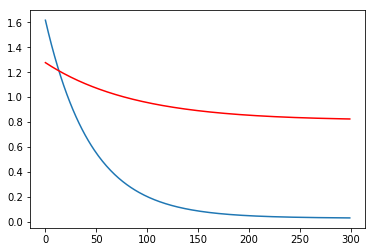

In [0]:
import matplotlib.pyplot as plt
x_axis = range(epoch)
y_axis = list_cost
yw_axis = list_w
plt.plot(x_axis, y_axis)
plt.plot(x_axis, yw_axis, color='red')
plt.show()

#Red Neuronal sobre mnist

In [0]:

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.metrics import confusion_matrix
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
import matplotlib.pyplot as plt

In [0]:
print(len(mnist.train.labels))
print(len(mnist.test.labels))

55000
10000


In [0]:
IMG_SIZE = 28
IMG_SIZE_FLAT = IMG_SIZE * IMG_SIZE # imagen aplanada en un vector
IMG_SHAPE = (IMG_SIZE, IMG_SIZE)
NUM_CLASSES = 10

In [0]:
def plot_images(images, labels, labels_pred=None):
  fig, axes = plt.subplots(3,3) # lienzo de 3x3
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(IMG_SHAPE), cmap='gray') # hace el reshape de 28x28
    if labels_pred is None:
      xlabel = "True: {0}".format(labels[i])
    else:
      xlabel = "True: {0}, Pred: {1}".format(labels[i], labels_pred[i])
    ax.set_xlabel(xlabel)
    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

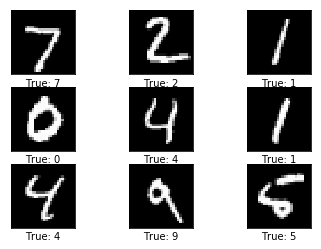

In [0]:
images = mnist.test.images[:9]
labels = mnist.test.labels[:9]
plot_images(images, labels)

In [0]:
x = tf.placeholder(shape=[None, IMG_SIZE_FLAT], dtype=tf.float32) # none porque mandare mas de una muestra, y la dimension de la imagen
y_true = tf.placeholder(shape=[None], dtype=tf.int64)

W = tf.Variable(tf.zeros([IMG_SIZE_FLAT, NUM_CLASSES]), dtype=tf.float32)
b = tf.Variable(tf.zeros([NUM_CLASSES]), dtype=tf.float32)


# Definicion de Proceso
logits = tf.matmul(x, W) + b
activation = tf.nn.softmax(logits)

# tf.argmax 
# [[1,2,3,4], [5,6,7,2], [8,9,2,3]] shape (3,4)
# axis 1 = [3,2,1]
# axis 2 = [2, 2, 1, 0]
# argmax: te trae el promedio por cada muestra dependiendo del axis para axis = 0, va comparar elemento por elemento y el resultado va tener len del shape en el indice 1, el maximo entre columnas de las muestras.
# caso contrario para el axis = 1, la maxima muestra

y_pred = tf.argmax(activation, axis=1)


# Entrenamiento
one_hot = tf.cast(tf.one_hot(y_true, depth=NUM_CLASSES), dtype=tf.float32) # genera one hot correspondiente para cada muestra
cost_function = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot)

# Cost function
cost = tf.reduce_mean(cost_function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Evaluate
correct_prediction = tf.equal(y_true, y_pred) # booleanos true, false
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32)) # booleanos a float para obtner el promedio

In [0]:
# batch of images
batch_size = 100

sess = tf.Session() # queda abierto la session por lo que se debe cerrar despues
sess.run(tf.global_variables_initializer())

def train(num_iterations):
  for i in range(num_iterations):
    x_batch, y_true_batch = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict={x: x_batch, y_true: y_true_batch})
    
def test():
  feed_dict_test = {x: mnist.test.images, y_true: mnist.test.labels}
  acc = sess.run(accuracy, feed_dict=feed_dict_test)
  print("Accuracy on test-set: {0:1.}%".format(acc))

In [0]:
def print_confusion_matrix():
  cls_true = mnist.test.labels
  # Get the predicted classifications
  feed_dict_test = {x: mnist.test.images, y_true: mnist.test.labels}
  cls_pred = sess.run(y_pred, feed_dict=feed_dict_test)
  cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
  print(cm)
  # Plot confusion as image
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.colorbar()
  tick_marks = np.arange(NUM_CLASSES)
  plt.xticks(tick_marks, range(NUM_CLASSES))
  plt.yticks(tick_marks, range(NUM_CLASSES))
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [0]:
def plot_weights():
  wi = sess.run(W)
  w_min = np.min(wi)
  w_max = np.max(wi)
  fig, axes = plt.subplots(3, 4)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)
  for i, ax in enumerate(axes.flat):
    if i < 10:
      image = wi[:,i].reshape(IMG_SHAPE)
      ax.set_xlabel("Weights: {0}".format(i))
      ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
test()

ValueError: ignored

In [0]:
train(200)

In [0]:
test()

ValueError: ignored

[[ 941    0    6    5    0    0   19    1    8    0]
 [   0 1090   16    3    0    0    4    1   21    0]
 [  29   48  824   26   20    0   29   22   34    0]
 [   9    9   30  870    1    5    8   24   42   12]
 [   5   17    7    0  836    0   26    4   14   73]
 [  57   44   20  192   34  392   36   40   54   23]
 [  37   16   22    2    9   12  855    0    5    0]
 [  10   54   33    0   10    0    2  885    7   27]
 [  22   42   23   82   11    7   20   21  730   16]
 [  27   23   13   13  107    1    3   63   16  743]]


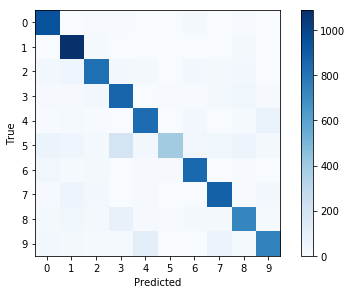

In [0]:
print_confusion_matrix()

Rojo: Pesos mas activos
Azul:     mas cerrados


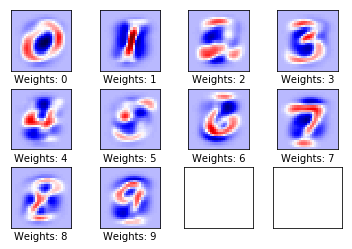

In [0]:
plot_weights()